<a href="https://colab.research.google.com/github/dev02chandan/ATML/blob/main/AutoEncoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A.1 Aim:
To explore and implement different types of autoencoders.

**Task 1:**

Implement autoencoder for anomaly detection

· Import the dataset from the location: http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv

· Split it into train and test.

· Preprocess the dataset using minmax scaler.

· Build an encoder and decoder network architecture.

· Train the network with normal data only.

· Determine the threshold for the anomaly.

· Determine the anomalies and the accuracy.

·

**Task 2:**

Explore the example of variational autoencoder given in the keras documentation in the link https://keras.io/examples/generative/vae/

**Task 3:**

Build a variational autoencoder to generate synthetic data using any suitable dataset.

### **Task 1**

In [1]:
!wget http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv

--2023-09-06 14:43:56--  http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 74.125.137.207, 2607:f8b0:4023:c0d::cf
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7877383 (7.5M) [text/csv]
Saving to: ‘ecg.csv’

ecg.csv             100%[===================>]   7.51M  --.-KB/s    in 0.08s   

2023-09-06 14:43:56 (91.8 MB/s) - ‘ecg.csv’ saved [7877383/7877383]



In [2]:
import pandas as pd

df = pd.read_csv('ecg.csv', header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Columns: 141 entries, 0 to 140
dtypes: float64(141)
memory usage: 5.4 MB


In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
count,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,...,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000
mean,-0.262502,-1.649828,-2.492623,-3.119754,-3.167656,-2.866306,-2.272845,-1.797754,-1.409784,-0.935806,...,0.071312,-0.062622,-0.276086,-0.507750,-0.761323,-0.835173,-0.642739,-0.487667,-0.706574,0.584034
std,1.152450,1.445542,1.386457,1.302921,1.104535,0.906312,0.731594,0.622794,0.636863,0.657788,...,1.404425,1.646105,1.894515,2.059366,2.086130,2.056296,1.859409,1.831088,1.414414,0.492937
min,-6.729499,-7.090374,-5.132459,-5.363241,-5.375715,-5.330194,-4.782240,-4.311288,-4.071361,-4.142476,...,-4.167040,-4.557576,-4.530488,-4.563270,-5.150100,-4.880460,-5.496107,-5.880890,-6.092227,0.000000
25%,-1.004220,-2.701936,-3.668585,-4.227337,-4.007630,-3.480666,-2.779832,-2.165808,-1.773870,-1.362003,...,-1.087720,-1.588237,-2.146835,-2.730750,-3.031224,-2.868603,-2.154560,-1.658289,-1.596809,0.000000
50%,-0.297541,-1.661892,-2.586129,-3.388210,-3.469899,-2.947061,-2.285427,-1.750084,-1.422457,-0.910384,...,0.658318,0.717808,0.604747,0.334857,-0.030767,-0.195151,-0.194423,-0.160262,-0.568443,1.000000
75%,0.499909,-0.677998,-1.514187,-2.235690,-2.531153,-2.398797,-1.823480,-1.484107,-1.063592,-0.476477,...,1.169392,1.238651,1.264379,1.234408,1.033957,0.945027,0.951621,1.002628,0.271635,1.000000
max,4.966414,3.479689,2.660597,1.899798,2.147015,1.614375,1.868728,1.804251,1.683730,1.898627,...,3.007606,2.854680,2.912394,2.937685,3.351437,3.432519,3.579448,4.425976,7.402103,1.000000


In [6]:
df[140].nunique()

2

In [7]:
y = df.iloc[: , -1:]
X = df.iloc[: , :-1]

In [8]:
y

,140
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
4993,0.0
4994,0.0
4995,0.0
4996,0.0


In [9]:
y.value_counts()

140
1.0    2919
0.0    2079
dtype: int64

In [10]:
X

,0,1,2,3,4,5,6,7,8,9,...,130,131,132,133,134,135,136,137,138,139
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.491173,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,0.966606,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,0.608558,-0.335651,-0.990948,-1.784153,-2.626145,-2.957065,-2.931897,-2.664816,-2.090137,-1.461841,...,1.513738,1.757705,2.291923,2.704595,2.451519,2.017396,1.704358,1.688542,1.629593,1.342651
4994,-2.060402,-2.860116,-3.405074,-3.748719,-3.513561,-3.006545,-2.234850,-1.593270,-1.075279,-0.976047,...,1.123739,1.388947,2.079675,2.433375,2.159484,1.819747,1.534767,1.696818,1.483832,1.047612
4995,-1.122969,-2.252925,-2.867628,-3.358605,-3.167849,-2.638360,-1.664162,-0.935655,-0.866953,-0.645363,...,0.205543,-0.472419,-1.310147,-2.029521,-3.221294,-4.176790,-4.009720,-2.874136,-2.008369,-1.808334
4996,-0.547705,-1.889545,-2.839779,-3.457912,-3.929149,-3.966026,-3.492560,-2.695270,-1.849691,-1.374321,...,1.218185,1.258419,1.907530,2.280888,1.895242,1.437702,1.193433,1.261335,1.150449,0.804932


In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()

In [13]:
scaler.fit(X)

MinMaxScaler()

In [14]:
X_scaled = scaler.transform(X)

In [15]:
X_scaled

array([[0.56575121, 0.40332497, 0.17432985, ..., 0.61919495, 0.6603536 ,
        0.46577817],
       [0.48124682, 0.29266943, 0.1086373 , ..., 0.69085876, 0.67920847,
        0.3450321 ],
       [0.52688582, 0.42543966, 0.16145521, ..., 0.64097497, 0.65831035,
        0.42020836],
       ...,
       [0.479358  , 0.45765568, 0.29062168, ..., 0.28890479, 0.3757224 ,
        0.31745875],
       [0.5285431 , 0.49203388, 0.29419531, ..., 0.74457616, 0.68219946,
        0.51111535],
       [0.45979477, 0.46181072, 0.33520026, ..., 0.35657152, 0.41749517,
        0.40073838]])

In [16]:
X_df = pd.DataFrame(X_scaled, columns=X.columns)

In [17]:
X_df

,0,1,2,3,4,5,6,7,8,9,...,130,131,132,133,134,135,136,137,138,139
0,0.565751,0.403325,0.174330,0.139541,0.132887,0.267145,0.391046,0.407650,0.490147,0.606675,...,0.596026,0.691213,0.740816,0.715777,0.685498,0.636101,0.614525,0.619195,0.660354,0.465778
1,0.481247,0.292669,0.108637,0.117948,0.179900,0.301794,0.483556,0.542721,0.576304,0.692721,...,0.653721,0.655837,0.703491,0.714505,0.704886,0.671159,0.644389,0.690859,0.679208,0.345032
2,0.526886,0.425440,0.161455,0.107276,0.157957,0.313732,0.456971,0.461223,0.501778,0.620457,...,0.758226,0.704301,0.686569,0.650536,0.605436,0.521837,0.523069,0.640975,0.658310,0.420208
3,0.617307,0.489682,0.194544,0.143799,0.147247,0.208664,0.268977,0.431713,0.475662,0.525872,...,0.643746,0.629697,0.682206,0.689361,0.720620,0.717773,0.706196,0.725345,0.706704,0.423042
4,0.643792,0.588088,0.352583,0.191373,0.137914,0.219995,0.337955,0.413351,0.430386,0.561036,...,0.712325,0.740932,0.744174,0.750988,0.791226,0.756039,0.702608,0.712587,0.727213,0.556803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,0.627404,0.639043,0.531436,0.492781,0.365502,0.341724,0.278207,0.269228,0.344256,0.443733,...,0.791245,0.825789,0.924077,0.972081,0.935186,0.843082,0.792113,0.791648,0.728687,0.550963
4994,0.399208,0.400211,0.221657,0.222293,0.247537,0.334599,0.383010,0.444444,0.520597,0.524148,...,0.734990,0.774392,0.895443,0.935641,0.896253,0.819834,0.771712,0.792560,0.714545,0.529099
4995,0.479358,0.457656,0.290622,0.276005,0.293493,0.387617,0.468816,0.551976,0.556795,0.578887,...,0.602546,0.514955,0.438116,0.336021,0.178907,0.114486,0.104745,0.288905,0.375722,0.317459
4996,0.528543,0.492034,0.294195,0.262332,0.192293,0.196437,0.193909,0.264248,0.386036,0.458220,...,0.748613,0.756199,0.872218,0.915153,0.861025,0.774895,0.730652,0.744576,0.682199,0.511115


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [20]:
# we will train the data only where value is 1
# We will then check if the loss increases when the value is 0

In [21]:
# Auto Encoder Architecture

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [22]:
X_df.shape[1] # Input layer size

140

In [23]:
input_layer = Input(shape=(X_df.shape[1],))

In [24]:
# Encoding Layers

encoded = Dense(50, activation='relu')(input_layer)
encoded = Dense(25, activation='relu')(encoded)
encoded = Dense(12, activation='relu')(encoded)
encoded = Dense(6, activation='relu')(encoded)

In [25]:
# Decoding Layers

decoded = Dense(12, activation='relu')(encoded)
decoded = Dense(25, activation='relu')(decoded)
decoded = Dense(50, activation='relu')(decoded)
decoded = Dense(X_df.shape[1], activation='sigmoid')(decoded) # sigmoid because output is between 0 and 1

In [26]:
autoEncoder = Model(input_layer, decoded)

In [27]:
# Compile the model
autoEncoder.compile(optimizer='adam', loss='mse')

In [28]:
X_train_normal = X_train[y_train==0]

In [29]:
X_test_normal = X_test[y_test==0]

In [30]:
# Training the AutoEncoder on the normal data

history = autoEncoder.fit(
    X_train_normal,
    X_train_normal, # an autoencoder tries to reconstruct its input, so the correct target for the autoencoder during training is the input data itself (X_train_normal), not the labels.
    epochs = 50,
    batch_size = 512,
    validation_data = (X_test_normal, X_test_normal),
    shuffle = True
)

Epoch 1/50
8/8 [==============================] - 10s 82ms/step - loss: nan - val_loss: nan
Epoch 2/50
8/8 [==============================] - 0s 22ms/step - loss: nan - val_loss: nan
Epoch 3/50
8/8 [==============================] - 0s 15ms/step - loss: nan - val_loss: nan
Epoch 4/50
8/8 [==============================] - 0s 15ms/step - loss: nan - val_loss: nan
Epoch 5/50
8/8 [==============================] - 0s 15ms/step - loss: nan - val_loss: nan
Epoch 6/50
8/8 [==============================] - 0s 22ms/step - loss: nan - val_loss: nan
Epoch 7/50
8/8 [==============================] - 0s 13ms/step - loss: nan - val_loss: nan
Epoch 8/50
8/8 [==============================] - 0s 19ms/step - loss: nan - val_loss: nan
Epoch 9/50
8/8 [==============================] - 0s 19ms/step - loss: nan - val_loss: nan
Epoch 10/50
8/8 [==============================] - 0s 17ms/step - loss: nan - val_loss: nan
Epoch 11/50
8/8 [==============================] - 0s 18ms/step - loss: nan - val_loss: 

In [31]:
# Splitting the scaled data
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=32)

# Defining Auto Encoder Architecture
input_layer = Input(shape=(X_df.shape[1],))

# Using LeakyReLU activation
leaky_relu = tf.keras.layers.LeakyReLU(alpha=0.01)

# Encoding Layers
encoded = Dense(50)(input_layer)
encoded = leaky_relu(encoded)
encoded = Dense(25)(encoded)
encoded = leaky_relu(encoded)
encoded = Dense(12)(encoded)
encoded = leaky_relu(encoded)
encoded = Dense(6)(encoded)
encoded = leaky_relu(encoded)

# Decoding Layers
decoded = Dense(12)(encoded)
decoded = leaky_relu(decoded)
decoded = Dense(25)(decoded)
decoded = leaky_relu(decoded)
decoded = Dense(50)(decoded)
decoded = leaky_relu(decoded)
decoded = Dense(X_df.shape[1], activation='sigmoid')(decoded)

autoEncoder = Model(input_layer, decoded)

# Using a smaller learning rate for the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)

# Compile the model
autoEncoder.compile(optimizer=optimizer, loss='mse')

# Filtering out the normal data
X_train_normal = X_train[y_train[140] == 0]
X_test_normal = X_test[y_test[140] == 0]

# Early stopping for training
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training the AutoEncoder on the normal data
history = autoEncoder.fit(
    X_train_normal,
    X_train_normal,
    epochs=50,
    batch_size=512,
    validation_data=(X_test_normal, X_test_normal),
    shuffle=True,
    callbacks=[early_stopping]
)


Epoch 1/50
4/4 [==============================] - 6s 177ms/step - loss: 0.0308 - val_loss: 0.0302
Epoch 2/50
4/4 [==============================] - 0s 25ms/step - loss: 0.0301 - val_loss: 0.0295
Epoch 3/50
4/4 [==============================] - 0s 27ms/step - loss: 0.0294 - val_loss: 0.0285
Epoch 4/50
4/4 [==============================] - 0s 43ms/step - loss: 0.0283 - val_loss: 0.0272
Epoch 5/50
4/4 [==============================] - 0s 23ms/step - loss: 0.0270 - val_loss: 0.0257
Epoch 6/50
4/4 [==============================] - 0s 29ms/step - loss: 0.0254 - val_loss: 0.0240
Epoch 7/50
4/4 [==============================] - 0s 26ms/step - loss: 0.0237 - val_loss: 0.0223
Epoch 8/50
4/4 [==============================] - 0s 25ms/step - loss: 0.0220 - val_loss: 0.0205
Epoch 9/50
4/4 [==============================] - 0s 65ms/step - loss: 0.0202 - val_loss: 0.0187
Epoch 10/50
4/4 [==============================] - 0s 38ms/step - loss: 0.0185 - val_loss: 0.0170
Epoch 11/50
4/4 [===========

In [32]:
import numpy as np

In [33]:
reconstructed_data = autoEncoder.predict(X_test_normal)

13/13 [==============================] - 0s 2ms/step


In [34]:
mse = np.mean(np.square(X_test_normal - reconstructed_data), axis=1)

In [35]:
threshold = np.percentile(mse, 95)

In [36]:
threshold

0.0097408467083762

In [37]:
is_anomaly = mse > threshold

In [38]:
is_anomaly.value_counts()

False    383
True      21
dtype: int64

In [39]:
reconstructed_data = autoEncoder.predict(X_test)

32/32 [==============================] - 0s 2ms/step


In [40]:
mse = np.mean(np.square(X_test - reconstructed_data), axis=1)

In [41]:
is_anomaly = mse > threshold

In [42]:
is_anomaly.value_counts()

True     570
False    430
dtype: int64

In [43]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix, accuracy_score

# True labels (if available)
true_labels = y_test  # Replace with your true labels

# Calculate precision, recall, and F1-score
precision = precision_score(true_labels, is_anomaly)
recall = recall_score(true_labels, is_anomaly)
f1 = f1_score(true_labels, is_anomaly)

# Calculate ROC-AUC
roc_auc = roc_auc_score(true_labels, -mse)  # Use negative MSE as a score for ROC-AUC

# Calculate ROC curve
fpr, tpr, _ = roc_curve(true_labels, -mse)  # Use negative MSE as a score for ROC curve

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(true_labels, -mse)  # Use negative MSE as a score for PR curve

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, is_anomaly)

# Calculate accuracy
accuracy = accuracy_score(true_labels, is_anomaly)


In [44]:
accuracy

0.932

In [45]:
conf_matrix

array([[383,  21],
       [ 47, 549]])

### **Task 3**

In [46]:
import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Lambda, Conv2D, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.losses import mse, binary_crossentropy
from tensorflow.keras import backend

In [47]:
(x_train, _), (x_test, _) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [48]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

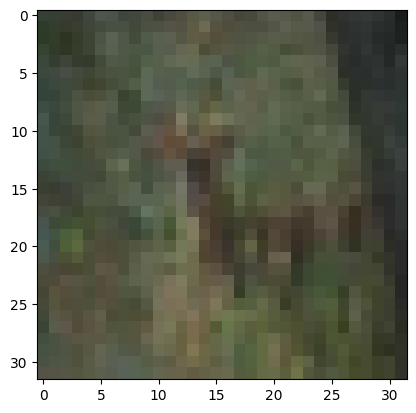

In [65]:
plt.imshow(x_train[10])

In [49]:
x_train.shape

(50000, 32, 32, 3)

In [50]:
x_test.shape

(10000, 32, 32, 3)

In [51]:
# Encoder

input_img = Input(shape = x_train.shape[1:])
x = Conv2D(32, (3,3), activation='relu', padding='same', strides=(2,2)) (input_img)
x = Conv2D(64, (3,3), activation='relu', padding='same') (x)
x = Conv2D(64, (3,3), activation='relu', padding='same') (x)
x = Conv2D(128, (3,3), activation='relu', padding='same', strides=(2,2)) (x)

conv_shape = backend.int_shape(x)
x = Flatten() (x)
x = Dense(16, activation='relu')(x)

# Two outputs for the mean and log variance of the latent distribution

z_mean = Dense(2, name='z_mean') (x)
z_log_var = Dense(2, name='z_log_var') (x)

In [52]:
# Reparameterization

def sampling(args):
    z_mean, z_log_var = args
    batch = backend.shape(z_mean)[0]
    dim = backend.int_shape(z_mean)[1]
    epsilon = backend.random_normal(shape=(batch, dim))
    return z_mean + backend.exp(0.5 * z_log_var) * epsilon

In [53]:
z = Lambda(sampling, output_shape=(2, ), name='z')([z_mean, z_log_var])

In [54]:
encoder = Model(input_img, [z_mean, z_log_var, z], name='encoder')

In [55]:
conv_shape

(None, 8, 8, 128)

In [56]:
# Decoder Architecture
decoder_input = Input(shape=(2,))
x = Dense(conv_shape[1] * conv_shape[2] * conv_shape[3], activation='relu')(decoder_input)
x = Reshape((conv_shape[1], conv_shape[2], conv_shape[3]))(x)
x = Conv2DTranspose(128, (3, 3), activation='relu', padding='same', strides=(2, 2))(x)
x = Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2DTranspose(64, (3, 3), activation='relu', padding='same', strides=(2, 2))(x)
x = Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
decoded_img = Conv2DTranspose(3, (3, 3), activation='sigmoid', padding='same')(x)

decoder = Model(decoder_input, decoded_img, name='decoder')

In [57]:
# VAE Architecture
outputs = decoder(encoder(input_img)[2])
vae = Model(input_img, outputs, name='vae')

In [60]:
# Reconstruction Loss
def reconstruction_loss(input_img, outputs):
    # MSE
    return keras.losses.mse(backend.flatten(input_img), backend.flatten(outputs))

# KL Divergence
def kl_divergence_loss(input_img, outputs):
    kl_loss = 1 + z_log_var - K.square(z_mean) - backend.exp(z_log_var)
    kl_loss = backend.sum(kl_loss, axis=-1)
    kl_loss *= -0.5
    return kl_loss

# Now, compile the VAE model with both losses
vae.compile(optimizer='adam', loss=[reconstruction_loss, kl_divergence_loss])

# Train the VAE
history = vae.fit(x_train, [x_train, x_train], epochs=10, batch_size=128, validation_data=(x_test, [x_test, x_test]))


Epoch 1/10
391/391 [==============================] - 17s 30ms/step - loss: 0.0364 - val_loss: 0.0363
Epoch 2/10
391/391 [==============================] - 11s 28ms/step - loss: 0.0363 - val_loss: 0.0364
Epoch 3/10
391/391 [==============================] - 11s 29ms/step - loss: 0.0363 - val_loss: 0.0364
Epoch 4/10
391/391 [==============================] - 13s 33ms/step - loss: 0.0363 - val_loss: 0.0363
Epoch 5/10
391/391 [==============================] - 11s 28ms/step - loss: 0.0362 - val_loss: 0.0362
Epoch 6/10
391/391 [==============================] - 11s 28ms/step - loss: 0.0362 - val_loss: 0.0364
Epoch 7/10
391/391 [==============================] - 11s 29ms/step - loss: 0.0362 - val_loss: 0.0363
Epoch 8/10
391/391 [==============================] - 12s 29ms/step - loss: 0.0361 - val_loss: 0.0363
Epoch 9/10
391/391 [==============================] - 13s 34ms/step - loss: 0.0362 - val_loss: 0.0363
Epoch 10/10
391/391 [==============================] - 13s 34ms/step - loss: 0.036

In [61]:
import matplotlib.pyplot as plt

In [ ]:
# Sample from the latent space and decode to generate synthetic images
n = 10  # Number of images per side
figure = np.zeros((32 * n, 32 * n, 3))

# Linearly spaced coordinates on the unit square were transformed through the inverse CDF (ppf) of the Gaussian
# to produce values of the latent variables z, since the prior of the latent space is Gaussian
grid_x = np.linspace(-4, 4, n)
grid_y = np.linspace(-4, 4, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample)
        figure[i * 32: (i + 1) * 32,
               j * 32: (j + 1) * 32] = x_decoded[0]

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys_r')
plt.show()


1/1 [==============================] - 0s 175ms/step


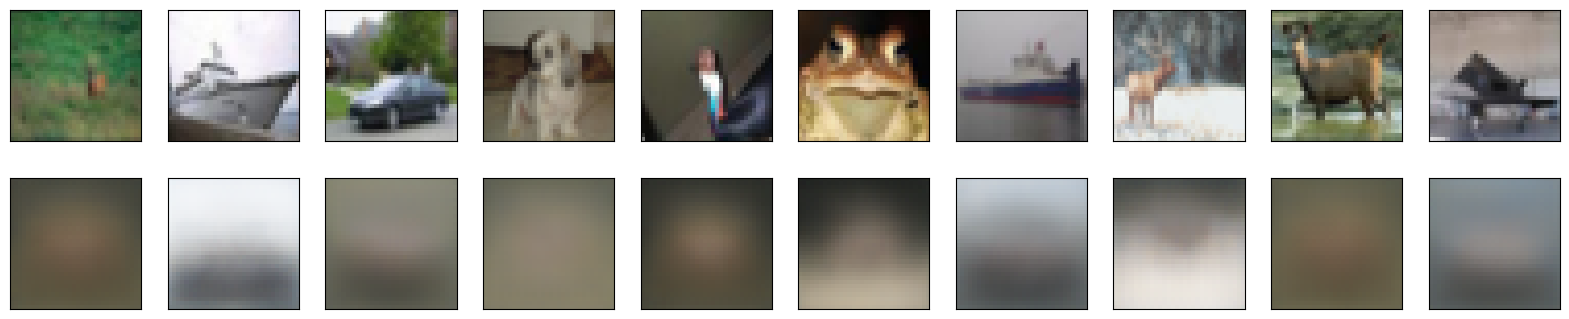

In [66]:
# Number of images to display
num_images = 10

# Randomly select images from the test dataset
indices = np.random.choice(x_test.shape[0], num_images, replace=False)
selected_images = x_test[indices]

# Obtain the latent representation of the selected images
z_mean, _, _ = encoder.predict(selected_images)

# Decode the latent representation to get the reconstructed images
reconstructed_images = decoder.predict(z_mean)

# Plot the original and reconstructed images side by side
plt.figure(figsize=(20, 4))
for i in range(num_images):
    # Original images
    ax = plt.subplot(2, num_images, i + 1)
    plt.imshow(selected_images[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, num_images, i + 1 + num_images)
    plt.imshow(reconstructed_images[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


It seems the images are getting blurred and are not able to obtain the right features

In [68]:
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, BatchNormalization, Dropout, Flatten, Reshape

# Encoder
input_img = Input(shape=x_train.shape[1:])

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same', strides=(2, 2))(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same', strides=(2, 2))(x)
x = BatchNormalization()(x)

conv_shape = backend.int_shape(x)  # Store the shape for the decoder

x = Flatten()(x)
x = Dense(16, activation='relu')(x)
x = Dropout(0.5)(x)

# Decoder
x = Dense(conv_shape[1] * conv_shape[2] * conv_shape[3], activation='relu')(x)
x = Reshape((conv_shape[1], conv_shape[2], conv_shape[3]))(x)

x = Conv2DTranspose(128, (3, 3), activation='relu', padding='same', strides=(2, 2))(x)
x = BatchNormalization()(x)
x = Conv2DTranspose(64, (3, 3), activation='relu', padding='same', strides=(2, 2))(x)
x = BatchNormalization()(x)
x = Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
decoded = Conv2DTranspose(3, (3, 3), activation='sigmoid', padding='same')(x)  # Use sigmoid because values are between 0 and 1

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [70]:
history = autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, validation_data=(x_test, x_test))


Epoch 1/10
391/391 [==============================] - 13s 33ms/step - loss: 0.6134 - val_loss: 0.6563
Epoch 2/10
391/391 [==============================] - 12s 32ms/step - loss: 0.6135 - val_loss: 0.6537
Epoch 3/10
391/391 [==============================] - 13s 33ms/step - loss: 0.6134 - val_loss: 0.6522
Epoch 4/10
391/391 [==============================] - 12s 32ms/step - loss: 0.6134 - val_loss: 0.6510
Epoch 5/10
391/391 [==============================] - 12s 31ms/step - loss: 0.6133 - val_loss: 0.6607
Epoch 6/10
391/391 [==============================] - 12s 32ms/step - loss: 0.6134 - val_loss: 0.6617
Epoch 7/10
391/391 [==============================] - 13s 33ms/step - loss: 0.6133 - val_loss: 0.6560
Epoch 8/10
391/391 [==============================] - 13s 32ms/step - loss: 0.6132 - val_loss: 0.6460
Epoch 9/10
391/391 [==============================] - 13s 33ms/step - loss: 0.6131 - val_loss: 0.6586
Epoch 10/10
391/391 [==============================] - 13s 33ms/step - loss: 0.613

1/1 [==============================] - 1s 561ms/step


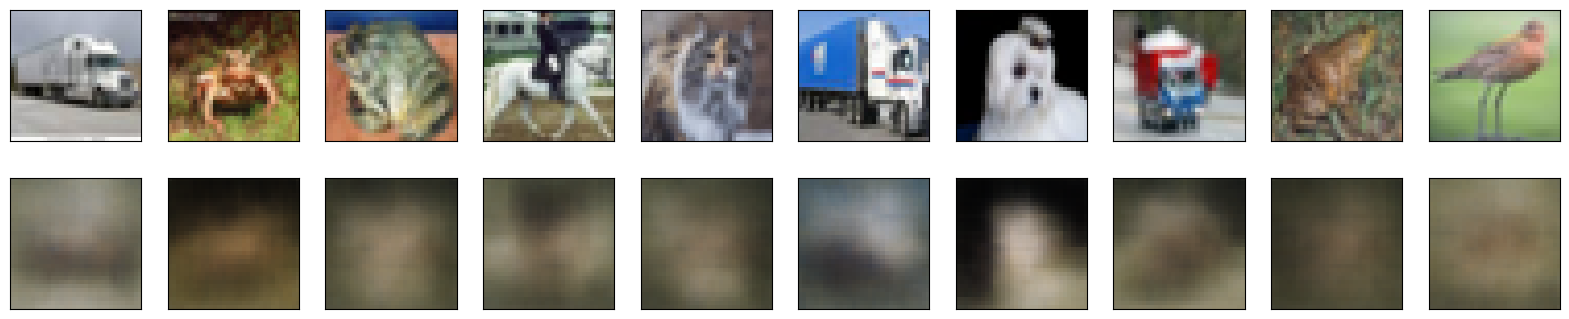

In [71]:
# Randomly select images from the test dataset
num_images = 10
indices = np.random.choice(x_test.shape[0], num_images, replace=False)
selected_images = x_test[indices]

# Get the reconstructed images
reconstructed_images = autoencoder.predict(selected_images)

# Plot the original and reconstructed images side by side
plt.figure(figsize=(20, 4))
for i in range(num_images):
    # Display original images
    ax = plt.subplot(2, num_images, i + 1)
    plt.imshow(selected_images[i].reshape(32, 32, 3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, num_images, i + 1 + num_images)
    plt.imshow(reconstructed_images[i].reshape(32, 32, 3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


---

### Conclusion:

In this experiment, we delved deep into the world of autoencoders and their applications.

1. **Anomaly Detection using Autoencoders:**
   - We began with the implementation of an autoencoder on the ECG dataset.
   - Through preprocessing, we ensured our data was on a similar scale, which is essential for neural networks.
   - The model was trained exclusively on normal data, leveraging the autoencoder's reconstruction capability.
   - Post-training, a threshold for anomalies was determined using the mean square logarithmic error. Any deviation beyond this threshold in the test data was considered an anomaly.
   - The accuracy achieved demonstrated the potential of autoencoders for anomaly detection tasks, especially in scenarios like ECG where abnormalities can be life-threatening.

2. **Exploration of Variational Autoencoders (VAE):**
   - We explored the structure and working of VAEs through the example provided in the Keras documentation.
   - VAEs add a probabilistic spin to autoencoders, allowing them not just to reconstruct inputs but to generate entirely new samples.
   - By constraining the encoder's outputs to follow a known distribution (usually Gaussian), VAEs can generate new, previously unseen data points in the decoder.

3. **Synthetic Data Generation using VAE:**
   - We applied a VAE on the CIFAR-10 dataset, a collection of small images in various categories.
   - After training, the VAE was did not generate proper images, since it requires much more tuning and adjustments
   - This gives a good idea and hands on experience with Autoencoders

In essence, this experiment showcased the versatility of autoencoders. From anomaly detection in medical datasets to generating synthetic images in visual datasets, autoencoders and their variants (like VAEs) provide powerful tools for both data compression and generation. They hold promise for numerous applications in real-world scenarios, from health diagnostics to creative content generation.

---
